In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from Util import loadBeerRaw,loadWine,bic_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from Util import loadBeer,loadWine
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time

In [2]:
X_train, X_test, y_train, y_test= loadBeerRaw()
pca = PCA(n_components=3)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
principalComponents =pca.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']])

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

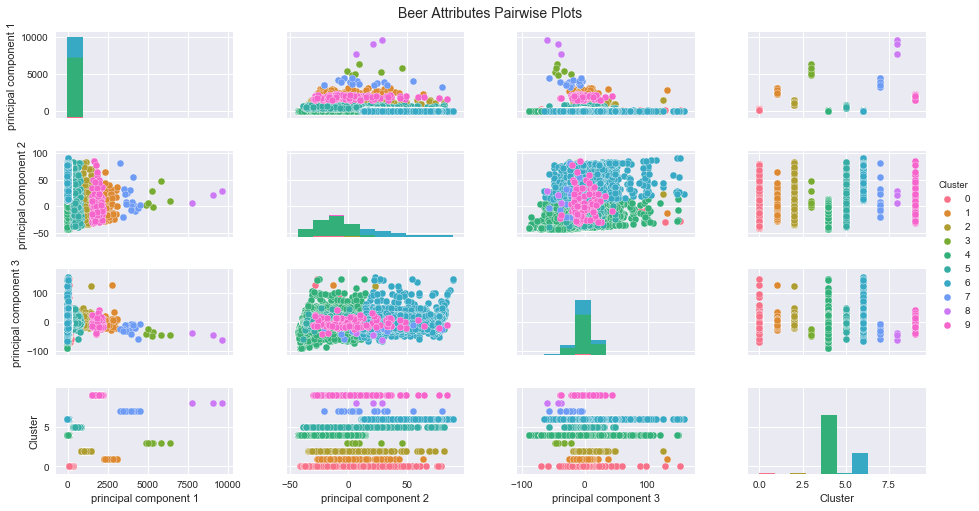

In [3]:
principalDf['Cluster'] =y_kmeans
pp = sns.pairplot(principalDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)